In [32]:
from datasets import load_dataset

dataset = load_dataset("microsoft/ms_marco", "v2.1")

print(dataset)

DatasetDict({
    validation: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 101093
    })
    train: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 808731
    })
    test: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 101092
    })
})


dataset['train'][0]

In [33]:
dataset['train'][0]

{'answers': ['The immediate impact of the success of the manhattan project was the only cloud hanging over the impressive achievement of the atomic researchers and engineers is what their success truly meant; hundreds of thousands of innocent lives obliterated.'],
 'passages': {'is_selected': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  'passage_text': ['The presence of communication amid scientific minds was equally important to the success of the Manhattan Project as scientific intellect was. The only cloud hanging over the impressive achievement of the atomic researchers and engineers is what their success truly meant; hundreds of thousands of innocent lives obliterated.',
   'The Manhattan Project and its atomic bomb helped bring an end to World War II. Its legacy of peaceful uses of atomic energy continues to have an impact on history and science.',
   'Essay on The Manhattan Project - The Manhattan Project The Manhattan Project was to see if making an atomic bomb possible. The success of th

In [34]:
dataset['train'][2]['passages']

{'is_selected': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 'passage_text': ['Western betrayal. The concept of Western betrayal refers to the view that the United Kingdom and France failed to meet their legal, diplomatic, military and moral obligations with respect to the Czech and Polish nations during the prelude to and aftermath of the Second World War.',
  "The Tuvan People's Republic, was proclaimed independent in 1921 and was a satellite state of Soviet Union until its annexation in 1944 by the Soviet Union. Another early Soviet satellite state in Asia was the short-lived Far East Republic in Siberia. Post-World War II",
  'Satellite state. The term satellite state designates a country that is formally independent in the world, but under heavy political, economic and military influence or control from another country. The term was coined by analogy to planetary objects orbiting a larger object, such as smaller moons revolving around larger planets, and is used mainly to refer to Central and

In [35]:
len(dataset['train'][0]['passages']['passage_text'])

10

In [36]:
for i in range(10):
    query = dataset['train'][i]['query']
    selected_passages = [
        p for p, f in zip(dataset['train'][i]['passages']['passage_text'], 
                          dataset['train'][i]['passages']['is_selected']) 
        if f > 0]
    print(query, selected_passages)


)what was the immediate impact of the success of the manhattan project? ['The presence of communication amid scientific minds was equally important to the success of the Manhattan Project as scientific intellect was. The only cloud hanging over the impressive achievement of the atomic researchers and engineers is what their success truly meant; hundreds of thousands of innocent lives obliterated.']
_________ justice is designed to repair the harm to victim, the community and the offender caused by the offender criminal act. question 19 options: ['The approach is based on a theory of justice that considers crime and wrongdoing to be an offense against an individual or community, rather than the State. Restorative justice that fosters dialogue between victim and offender has shown the highest rates of victim satisfaction and offender accountability.']
why did stalin want control of eastern europe ['There are 3 main reasons why Stalin wanted to control Eastern Europe. 1.) Russia has histo

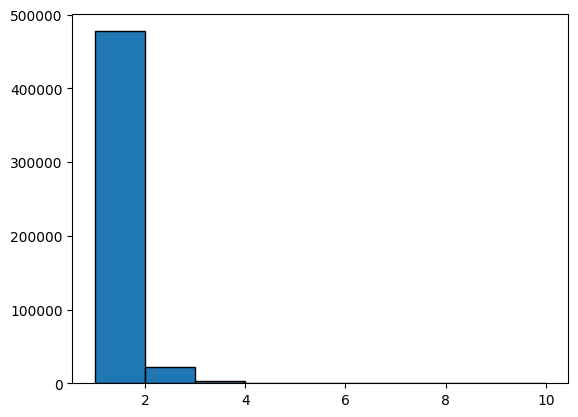

In [27]:
# plot the distribution of number of "selected" passages per query
# is_selected is a binary flag per passage, so it can vary between 0 and 10 (each query has exactly 10 passages)
import matplotlib.pyplot as plt
selected_counts = [
    sum(p['passages']['is_selected'])
    for p in dataset['train']
]
plt.hist(selected_counts, bins=range(1, 11), edgecolor='black')
plt.show()

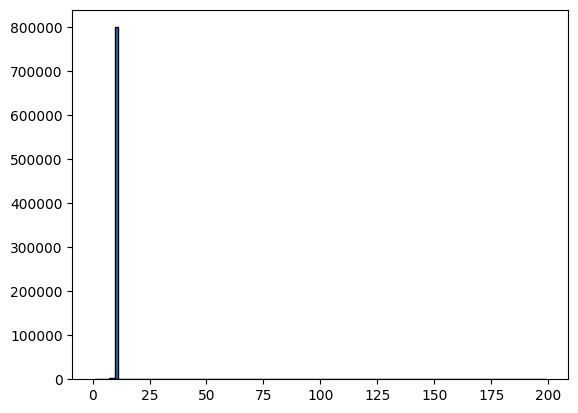

In [38]:
# average length of the passages
avg_lengths = [len(p['passages']['passage_text']) for p in dataset['train']]
plt.hist(avg_lengths, bins=range(1, 200), edgecolor='black')
plt.show()


In [ ]:
v1_dataset = load_dataset("ms_marco", "v1")